In [29]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import torch
import torch.nn as nn
from torch.distributions import Normal
from torch.distributions.kl import kl_divergence
import sys
sys.path.append('..')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[   0.    5.   10.   15.   20.   25.   30.   35.   40.   45.   50.   55.
  100.  105.  110.  115.  120.  125.  130.  135.  140.  145.  150.  155.
  200.  205.  210.  215.  220.  225.  230.  235.  240.  245.  250.  255.
  300.  305.  310.  315.  320.  325.  330.  335.  340.  345.  350.  355.
  400.  405.  410.  415.  420.  425.  430.  435.  440.  445.  450.  455.
  500.  505.  510.  515.  520.  525.  530.  535.  540.  545.  550.  555.
  600.  605.  610.  615.  620.  625.  630.  635.  640.  645.  650.  655.
  700.  705.  710.  715.  720.  725.  730.  735.  740.  745.  750.  755.
  800.  805.  810.  815.  820.  825.  830.  835.  840.  845.  850.  855.
  900.  905.  910.  915.  920.  925.  930.  935.  940.  945.  950.  955.
 1000. 1005. 1010. 1015. 1020. 1025. 1030. 1035. 1040. 1045. 1050. 1055.
 1100. 1105. 1110. 1115. 1120. 1125. 1130. 1135. 1140. 1145. 1150. 1155.
 1200. 1205. 1210. 1215. 1220. 1225. 1230. 1235. 1240. 1245. 1250. 1255.
 1300. 1305. 1310. 1315. 1320. 1325. 1330. 1335. 13

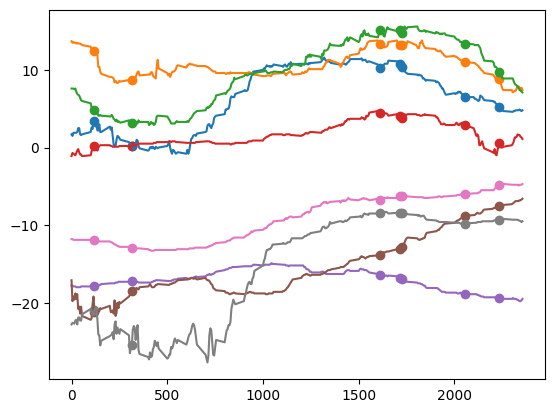

In [30]:
import pandas as pd
from data.tempdata import TempData
import matplotlib.pyplot as plt
# Load the data
data_path = '../data/data_with_desc.csv'
data = pd.read_csv(data_path, header=None)
data_test = TempData(data=data, max_num_context=10, device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu"))

batch, knowledge = data_test.generate_batch(batch_size=8, return_knowledge=True)

print(knowledge)
for i in range(8):
    x_target = batch.x_target[i].flatten()
    y_target = batch.y_target[i].flatten()
    plt.plot(x_target.numpy(), y_target.numpy())
for i in range(8):
    x_context = batch.x_context[i].flatten()
    y_context = batch.y_context[i].flatten()
    plt.scatter(x_context.numpy(), y_context.numpy())
plt.show()

In [11]:
print(sine_data_test.y_values)

tensor([[ -5.9000,  -5.6000,  -5.2000,  ...,  -8.1000,  -7.9000,  -8.0000],
        [ -8.4000,  -8.5000,  -8.8000,  ..., -16.3000, -16.3000, -16.3000],
        [-16.4000, -16.4000, -16.4000,  ..., -18.3000, -18.3000, -18.2000],
        ...,
        [  8.3000,   9.4000,   9.4000,  ...,   5.4000,   5.6000,   5.1000],
        [  5.2000,   4.7000,   3.9000,  ...,  11.1000,  11.1000,  11.2000],
        [ 11.3000,  11.3000,  11.3000,  ...,  10.4000,  10.4000,  10.3000]])


In [17]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torch.utils.data import DataLoader
import numpy as np

class TemperatureDataset(Dataset):

    def __init__(self, data: pd.DataFrame, max_num_context: int = 10):
        self.data = data
        self.max_num_context = max_num_context

        x_values = data.iloc[0][1:].values.astype('float32')
        self.x_values = torch.from_numpy(x_values) # Shape: [1, num_points]
        self.y_values_train = torch.tensor(data.iloc[1:508, 1:].values).float()  # Shape: [num_samples, num_points]
        self.y_values_val = torch.tensor(data.iloc[619:, 1:].values).float()  # Shape: [num_samples, num_points]
    
    def __len__(self):
        return len(self.y_values_train)
    
    def __getitem__(self, idx):
        y_values = self.y_values_train[idx]
        num_total_points = self.x_values.size(-1)
        num_context = np.random.randint(low=1, high=self.max_num_context)

        context_indices = np.random.choice(num_total_points, num_context, replace=False)

        x_context = self.x_values[context_indices]
        y_context = y_values[context_indices]

        x_target = self.x_values
        y_target = y_values

        return x_context, y_context, x_target, y_target
    


NeuralProcess(
  (deterministic_encoder): DeterminisitcEncoder(
    (phi): BatchMLP(
      (mlp): Sequential(
        (0): Linear(in_features=2, out_features=128, bias=True)
        (1): ReLU()
        (2): Linear(in_features=128, out_features=128, bias=True)
        (3): ReLU()
        (4): Linear(in_features=128, out_features=128, bias=True)
        (5): ReLU()
        (6): Linear(in_features=128, out_features=128, bias=True)
        (7): ReLU()
        (8): Linear(in_features=128, out_features=128, bias=True)
        (9): ReLU()
        (10): Linear(in_features=128, out_features=128, bias=True)
        (11): Identity()
      )
    )
    (rho): Linear(in_features=128, out_features=128, bias=True)
    (cross_attention_block): CrossAttention(
      (q_proj): Linear(in_features=128, out_features=128, bias=True)
      (k_proj): Linear(in_features=128, out_features=128, bias=True)
      (v_proj): Linear(in_features=128, out_features=128, bias=True)
      (o_proj): Linear(in_features=128, 

  0%|          | 0/100001 [00:00<?, ?it/s]

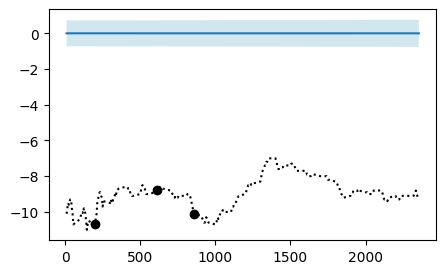

  1%|          | 1010/100001 [00:20<30:17, 54.48it/s]

iter 1001: Avg. Loss = 4.0934515302181245
iter 1001: Avg. Kasia Loss = 1170.7271547241212


  2%|▏         | 2008/100001 [00:41<33:36, 48.59it/s]

iter 2001: Avg. Loss = 3.04933470082283
iter 2001: Avg. Kasia Loss = 872.1097310180664


  3%|▎         | 3008/100001 [01:01<32:01, 50.47it/s]

iter 3001: Avg. Loss = 2.6928196053504942
iter 3001: Avg. Kasia Loss = 770.1464149780273


  4%|▍         | 4010/100001 [01:21<31:50, 50.24it/s]

iter 4001: Avg. Loss = 2.4893902971744537
iter 4001: Avg. Kasia Loss = 711.9656365356445


  5%|▍         | 4999/100001 [01:41<31:17, 50.60it/s]

iter 5001: Avg. Loss = 2.220578305721283
iter 5001: Avg. Kasia Loss = 635.0854008789063


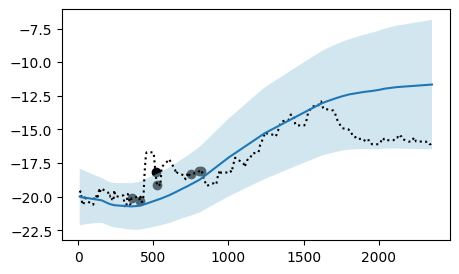

  6%|▌         | 6006/100001 [02:01<32:37, 48.03it/s]

iter 6001: Avg. Loss = 2.110117423534393
iter 6001: Avg. Kasia Loss = 603.4935901794433


  7%|▋         | 7009/100001 [02:22<32:23, 47.86it/s]

iter 7001: Avg. Loss = 2.0129352122545243
iter 7001: Avg. Kasia Loss = 575.6994741210938


  8%|▊         | 8006/100001 [02:43<31:02, 49.39it/s]

iter 8001: Avg. Loss = 1.9566927464008332
iter 8001: Avg. Kasia Loss = 559.6141310119629


  9%|▉         | 9006/100001 [03:03<30:39, 49.48it/s]

iter 9001: Avg. Loss = 1.9165002890825271
iter 9001: Avg. Kasia Loss = 548.1190894470215


 10%|▉         | 9996/100001 [03:22<29:06, 51.54it/s]

iter 10001: Avg. Loss = 1.7011324768066407
iter 10001: Avg. Kasia Loss = 486.5238935546875
iter 10001: Avg. Loss SLOW = 24.242952587366105


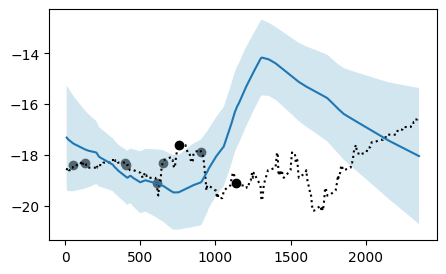

 11%|█         | 11005/100001 [03:42<27:08, 54.65it/s]

iter 11001: Avg. Loss = 1.5504080970287324
iter 11001: Avg. Kasia Loss = 443.41672061157226


 12%|█▏        | 12007/100001 [04:01<24:59, 58.70it/s]

iter 12001: Avg. Loss = 1.4700072283744812
iter 12001: Avg. Kasia Loss = 420.42207287597654


 13%|█▎        | 13010/100001 [04:21<30:06, 48.15it/s]

iter 13001: Avg. Loss = 1.4216617143154144
iter 13001: Avg. Kasia Loss = 406.5952543029785


 14%|█▍        | 14009/100001 [04:40<24:12, 59.18it/s]

iter 14001: Avg. Loss = 1.3963362321853638
iter 14001: Avg. Kasia Loss = 399.35216595458985


 15%|█▍        | 15000/100001 [05:00<30:10, 46.95it/s]

iter 15001: Avg. Loss = 1.3768011492490768
iter 15001: Avg. Kasia Loss = 393.76513287353515


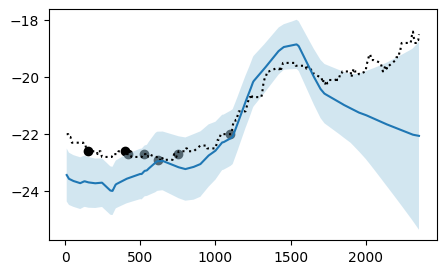

 16%|█▌        | 16008/100001 [05:20<29:05, 48.11it/s]

iter 16001: Avg. Loss = 1.3575590381622313
iter 16001: Avg. Kasia Loss = 388.2618890991211


 17%|█▋        | 17009/100001 [05:40<25:24, 54.43it/s]

iter 17001: Avg. Loss = 1.34952312541008
iter 17001: Avg. Kasia Loss = 385.96361935424807


 18%|█▊        | 18010/100001 [06:01<27:29, 49.71it/s]

iter 18001: Avg. Loss = 1.3405443999767304
iter 18001: Avg. Kasia Loss = 383.3957022399902


 19%|█▉        | 19007/100001 [06:21<25:56, 52.03it/s]

iter 19001: Avg. Loss = 1.3255955237150192
iter 19001: Avg. Kasia Loss = 379.1203251647949


 20%|█▉        | 20000/100001 [06:40<25:58, 51.34it/s]

iter 20001: Avg. Loss = 1.3239867707490922
iter 20001: Avg. Kasia Loss = 378.6602200317383
iter 20001: Avg. Loss SLOW = 13.912423279166221


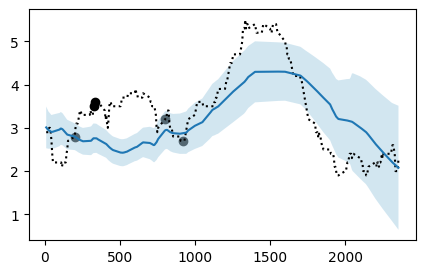

 21%|██        | 21007/100001 [07:01<28:02, 46.94it/s]

iter 21001: Avg. Loss = 1.3101666868925095
iter 21001: Avg. Kasia Loss = 374.70767700195313


 22%|██▏       | 21775/100001 [07:16<26:06, 49.94it/s]


KeyboardInterrupt: 

In [49]:
from src.plot import plot_predictive
from src.np import NeuralProcess
from tqdm import tqdm

x_dim = 1
y_dim = 1
determ_dim = 128  # Dimension of representation of context points
latent_dim = 128  # Dimension of sampled latent variable
hidden_dim = 128  # Dimension of hidden layers in encoder and decoder
np = NeuralProcess(x_dim=x_dim,
                   y_dim=y_dim,
                   hidden_dim=hidden_dim,
                   latent_dim=latent_dim,
                   determ_dim=determ_dim,
                   n_h_layers_decoder=4,
                   n_h_layers_phi_latent_encoder=2,
                   n_h_layers_rho_latent_encoder=1,
                   n_h_layers_phi_determ_encoder=5,
                   n_h_layers_rho_determ_encoder=0,
                   use_deterministic_path=True,
                   use_latent_self_attn=True,
                   use_determ_self_attn=False,
                   use_determ_cross_attn=True
                   )
print(np)
print(sum(p.numel() for p in np.parameters() if p.requires_grad))

#data = SineData(max_num_context=30, random_kernel_parameters=True)
optimiser = torch.optim.Adam(np.parameters(), lr=1e-3)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device {device}")
np.to(device)


data_path = '../data/data.csv'
data = pd.read_csv(data_path, header=None)
data = TempData(data=data , max_num_context=10, device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu"))
train_loss = []
avg_loss_fast = 0
avg_loss_slow = 0
avg_kasia_loss = 0
for iter in tqdm(range(100000+1)):
    np.training = True
    optimiser.zero_grad()

    batch = data.generate_batch(batch_size=64, device=device)
    p_y_pred, loss, log_lik, loss3 = np(batch.x_context, batch.y_context, batch.x_target, None, batch.y_target)

    loss.backward()
    optimiser.step()
    train_loss.append(loss.item())

    avg_loss_slow += loss.item()
    avg_loss_fast += loss.item()
    avg_kasia_loss += loss3.item()
    
    if iter % 1000 == 0 and iter > 0:
        print(f"iter {iter+1}: Avg. Loss = {avg_loss_fast/1000}")
        print(f"iter {iter+1}: Avg. Kasia Loss = {avg_kasia_loss/1000}")
        #print(f"iter. loss = {loss.item()}, iter. Loss2 (not being backpropped on) = {loss2.item()}")
        avg_loss_fast = 0
        avg_kasia_loss = 0
    if iter % 10000 == 0 and iter > 0:
        print(f"iter {iter+1}: Avg. Loss SLOW = {avg_loss_slow/1000}")
        avg_loss_slow = 0 
    if iter % 5000 == 0:
        np.training = False
        batch = data.generate_batch(batch_size=1, device=np.device)
        plot_predictive(np, batch, knowledge=None, save=False, iter=None)
        np.training = True

plt.plot(train_loss, label='train_loss')
window = 50
plt.plot([sum(train_loss[i:i+window])/window for i in range(len(train_loss)-window)], label=f'train_loss_{window}_smooth')
plt.legend()
plt.show()

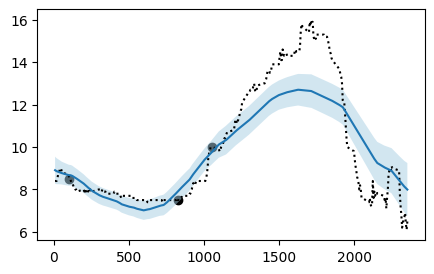

In [52]:
np.training = False
batch = data.generate_batch(batch_size=1, device=np.device)
plot_predictive(np, batch, knowledge=None, save=False, iter=None)
np.training = True


In [69]:
import transformers
from transformers import RobertaModel, RobertaTokenizer
tokenizer = RobertaTokenizer.from_pretrained('roberta-base', truncation=True, do_lower_case=True)
langmodel = RobertaModel.from_pretrained("roberta-base")
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
langmodel.to(device)
# freeze everything
for name, param in langmodel.named_parameters():
    #  if name == "pooler.dense.weight" or name == "pooler.dense.bias":
    #     param.requires_grad = True
    #  else:
    param.requires_grad = False

#verify
for name, param in langmodel.named_parameters():
    print(name,param.requires_grad)

/home/w/IML/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


embeddings.word_embeddings.weight False
embeddings.position_embeddings.weight False
embeddings.token_type_embeddings.weight False
embeddings.LayerNorm.weight False
embeddings.LayerNorm.bias False
encoder.layer.0.attention.self.query.weight False
encoder.layer.0.attention.self.query.bias False
encoder.layer.0.attention.self.key.weight False
encoder.layer.0.attention.self.key.bias False
encoder.layer.0.attention.self.value.weight False
encoder.layer.0.attention.self.value.bias False
encoder.layer.0.attention.output.dense.weight False
encoder.layer.0.attention.output.dense.bias False
encoder.layer.0.attention.output.LayerNorm.weight False
encoder.layer.0.attention.output.LayerNorm.bias False
encoder.layer.0.intermediate.dense.weight False
encoder.layer.0.intermediate.dense.bias False
encoder.layer.0.output.dense.weight False
encoder.layer.0.output.dense.bias False
encoder.layer.0.output.LayerNorm.weight False
encoder.layer.0.output.LayerNorm.bias False
encoder.layer.1.attention.self.query

NeuralProcess(
  (deterministic_encoder): DeterminisitcEncoder(
    (phi): BatchMLP(
      (mlp): Sequential(
        (0): Linear(in_features=2, out_features=128, bias=True)
        (1): ReLU()
        (2): Linear(in_features=128, out_features=128, bias=True)
        (3): ReLU()
        (4): Linear(in_features=128, out_features=128, bias=True)
        (5): ReLU()
        (6): Linear(in_features=128, out_features=128, bias=True)
        (7): ReLU()
        (8): Linear(in_features=128, out_features=128, bias=True)
        (9): ReLU()
        (10): Linear(in_features=128, out_features=128, bias=True)
        (11): Identity()
      )
    )
    (rho): Linear(in_features=128, out_features=128, bias=True)
    (cross_attention_block): CrossAttention(
      (q_proj): Linear(in_features=128, out_features=128, bias=True)
      (k_proj): Linear(in_features=128, out_features=128, bias=True)
      (v_proj): Linear(in_features=128, out_features=128, bias=True)
      (o_proj): Linear(in_features=128, 

  0%|          | 0/100001 [00:00<?, ?it/s]

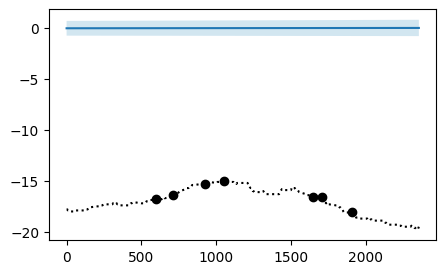

  1%|          | 1006/100001 [00:33<55:58, 29.48it/s]

iter 1001: Avg. Loss = 4.55817398929596


  2%|▏         | 2006/100001 [01:07<51:18, 31.83it/s]

iter 2001: Avg. Loss = 3.7723251523971557


  3%|▎         | 3006/100001 [01:40<54:52, 29.46it/s]

iter 3001: Avg. Loss = 145.2608692882061


  4%|▍         | 4004/100001 [02:13<53:21, 29.99it/s]

iter 4001: Avg. Loss = 2.8372761907577515


  5%|▌         | 5004/100001 [02:46<53:25, 29.63it/s]

iter 5001: Avg. Loss = 2.594788699746132


  6%|▌         | 6004/100001 [03:20<52:06, 30.06it/s]

iter 6001: Avg. Loss = 2.5801179920434953


  7%|▋         | 7006/100001 [03:53<50:46, 30.53it/s]

iter 7001: Avg. Loss = 2.4671902124881746


  8%|▊         | 8006/100001 [04:26<51:13, 29.93it/s]

iter 8001: Avg. Loss = 2.452869224667549


  9%|▉         | 9006/100001 [05:00<46:14, 32.79it/s]

iter 9001: Avg. Loss = 2.38536993265152


 10%|█         | 10004/100001 [05:32<50:45, 29.55it/s]

iter 10001: Avg. Loss = 2.3160227031707765
iter 10001: Avg. Loss SLOW = 171.2250033854246


 11%|█         | 11007/100001 [06:06<49:27, 29.99it/s]

iter 11001: Avg. Loss = 2.2119099467992784


 12%|█▏        | 12005/100001 [06:39<48:29, 30.25it/s]

iter 12001: Avg. Loss = 2.5846196551322937


 13%|█▎        | 13006/100001 [07:13<48:23, 29.97it/s]

iter 13001: Avg. Loss = 2.5742769038677213


 14%|█▍        | 14007/100001 [07:45<47:32, 30.15it/s]

iter 14001: Avg. Loss = 2.457335577726364


 15%|█▌        | 15005/100001 [08:18<46:53, 30.21it/s]

iter 15001: Avg. Loss = 2.4161523917913437


 16%|█▌        | 16005/100001 [08:51<46:53, 29.85it/s]

iter 16001: Avg. Loss = 2.3860993019342422


 17%|█▋        | 17003/100001 [09:25<45:43, 30.25it/s]

iter 17001: Avg. Loss = 2.345497728943825


 18%|█▊        | 18006/100001 [09:58<44:40, 30.59it/s]

iter 18001: Avg. Loss = 2.34254301905632


 19%|█▉        | 19003/100001 [10:31<44:25, 30.39it/s]

iter 19001: Avg. Loss = 2.309598006248474


 20%|█▉        | 19998/100001 [11:05<43:59, 30.31it/s]

iter 20001: Avg. Loss = 2.3202957125902177
iter 20001: Avg. Loss SLOW = 23.94832824409008


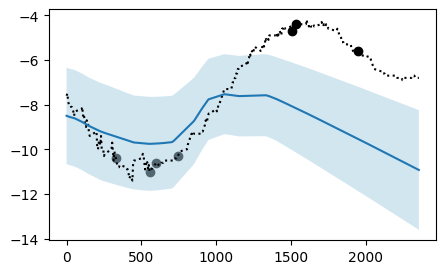

 21%|██        | 21005/100001 [11:38<43:13, 30.46it/s]

iter 21001: Avg. Loss = 2.3140419701337813


 22%|██▏       | 22006/100001 [12:12<42:48, 30.36it/s]

iter 22001: Avg. Loss = 2.3079225410223008


 23%|██▎       | 23004/100001 [12:45<42:39, 30.09it/s]

iter 23001: Avg. Loss = 2.3008670278787613


 24%|██▍       | 24006/100001 [13:18<41:58, 30.17it/s]

iter 24001: Avg. Loss = 2.304414862990379


 25%|██▌       | 25005/100001 [13:51<41:51, 29.86it/s]

iter 25001: Avg. Loss = 2.2681318821907044


 26%|██▌       | 26005/100001 [14:25<41:57, 29.39it/s]

iter 26001: Avg. Loss = 2.2689629683494568


 27%|██▋       | 27005/100001 [14:58<39:43, 30.63it/s]

iter 27001: Avg. Loss = 2.229993002772331


 28%|██▊       | 28006/100001 [15:31<40:04, 29.95it/s]

iter 28001: Avg. Loss = 2.244548672199249


 29%|██▉       | 29007/100001 [16:04<39:16, 30.13it/s]

iter 29001: Avg. Loss = 2.2454510141611097


 30%|███       | 30005/100001 [16:37<38:47, 30.07it/s]

iter 30001: Avg. Loss = 2.2420387389659884
iter 30001: Avg. Loss SLOW = 22.726372680664063


 31%|███       | 31004/100001 [17:11<38:39, 29.74it/s]

iter 31001: Avg. Loss = 2.2355771704912186


 32%|███▏      | 32006/100001 [17:44<36:47, 30.80it/s]

iter 32001: Avg. Loss = 2.2482160588502884


 33%|███▎      | 33004/100001 [18:17<37:33, 29.74it/s]

iter 33001: Avg. Loss = 2.2142466645240786


 34%|███▍      | 34004/100001 [18:50<33:31, 32.81it/s]

iter 34001: Avg. Loss = 2.200779264807701


 35%|███▌      | 35005/100001 [19:23<35:51, 30.21it/s]

iter 35001: Avg. Loss = 2.218281470298767


 36%|███▌      | 36006/100001 [19:56<36:03, 29.58it/s]

iter 36001: Avg. Loss = 2.2142563108205797


 37%|███▋      | 37005/100001 [20:30<35:10, 29.84it/s]

iter 37001: Avg. Loss = 2.1877100151777267


 38%|███▊      | 38006/100001 [21:03<34:50, 29.66it/s]

iter 38001: Avg. Loss = 2.1975030746459963


 39%|███▉      | 39007/100001 [21:36<33:34, 30.27it/s]

iter 39001: Avg. Loss = 2.181777549147606


 40%|███▉      | 39997/100001 [22:09<33:02, 30.27it/s]

iter 40001: Avg. Loss = 2.266423235416412
iter 40001: Avg. Loss SLOW = 22.164770814180375


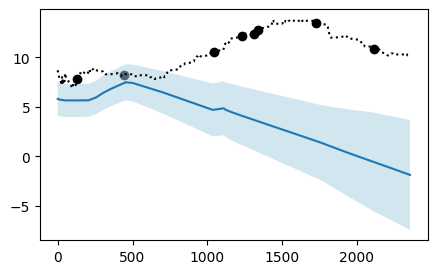

 41%|████      | 41005/100001 [22:43<33:30, 29.35it/s]

iter 41001: Avg. Loss = 2.2027088251113893


 42%|████▏     | 42007/100001 [23:16<31:43, 30.46it/s]

iter 42001: Avg. Loss = 2.1913783363103865


 43%|████▎     | 43006/100001 [23:49<31:57, 29.72it/s]

iter 43001: Avg. Loss = 2.1675628464221957


 44%|████▍     | 44004/100001 [24:22<30:55, 30.19it/s]

iter 44001: Avg. Loss = 2.1687926273345948


 45%|████▌     | 45005/100001 [24:56<30:55, 29.64it/s]

iter 45001: Avg. Loss = 2.1882294257879256


 46%|████▌     | 46005/100001 [25:29<29:56, 30.06it/s]

iter 46001: Avg. Loss = 2.168981800317764


 47%|████▋     | 47006/100001 [26:03<29:45, 29.67it/s]

iter 47001: Avg. Loss = 2.157712452530861


 48%|████▊     | 48006/100001 [26:36<28:38, 30.25it/s]

iter 48001: Avg. Loss = 2.163512468934059


 49%|████▉     | 49004/100001 [27:10<28:52, 29.43it/s]

iter 49001: Avg. Loss = 2.227021562933922


 50%|█████     | 50006/100001 [27:42<27:34, 30.21it/s]

iter 50001: Avg. Loss = 2.17884161567688
iter 50001: Avg. Loss SLOW = 21.814741961359978


 51%|█████     | 51005/100001 [28:15<26:51, 30.41it/s]

iter 51001: Avg. Loss = 2.1291081566810606


 52%|█████▏    | 52005/100001 [28:49<26:32, 30.13it/s]

iter 52001: Avg. Loss = 2.1474633249044417


 53%|█████▎    | 53005/100001 [29:22<26:04, 30.04it/s]

iter 53001: Avg. Loss = 2.123096127510071


 54%|█████▍    | 54007/100001 [29:55<25:41, 29.83it/s]

iter 54001: Avg. Loss = 2.116504266023636


 55%|█████▌    | 55006/100001 [30:28<25:15, 29.70it/s]

iter 55001: Avg. Loss = 2.0990169196128847


 56%|█████▌    | 56007/100001 [31:02<23:59, 30.56it/s]

iter 56001: Avg. Loss = 2.173685813188553


 57%|█████▋    | 57004/100001 [31:35<23:53, 30.00it/s]

iter 57001: Avg. Loss = 2.0907015792131425


 58%|█████▊    | 58003/100001 [32:08<23:34, 29.69it/s]

iter 58001: Avg. Loss = 2.069550216436386


 59%|█████▉    | 59004/100001 [32:41<22:54, 29.83it/s]

iter 59001: Avg. Loss = 2.087343559741974


 60%|█████▉    | 59997/100001 [33:14<21:52, 30.47it/s]

iter 60001: Avg. Loss = 2.069223347425461
iter 60001: Avg. Loss SLOW = 21.10569331073761


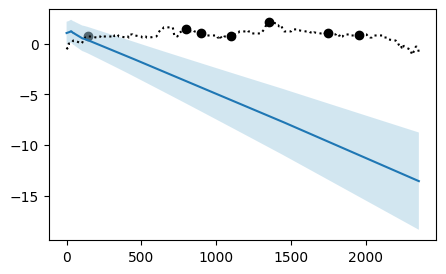

 61%|██████    | 61005/100001 [33:48<21:26, 30.32it/s]

iter 61001: Avg. Loss = 2.0432895152568817


 62%|██████▏   | 62004/100001 [34:21<20:52, 30.34it/s]

iter 62001: Avg. Loss = 2.0484290707111357


 63%|██████▎   | 63006/100001 [34:55<20:50, 29.59it/s]

iter 63001: Avg. Loss = 2.0635939638614653


 64%|██████▍   | 64005/100001 [35:28<20:11, 29.72it/s]

iter 64001: Avg. Loss = 2.028796895623207


 65%|██████▌   | 65005/100001 [36:01<19:16, 30.27it/s]

iter 65001: Avg. Loss = 2.0475475105047227


 66%|██████▌   | 66005/100001 [36:35<18:50, 30.06it/s]

iter 66001: Avg. Loss = 2.008208194732666


 67%|██████▋   | 67005/100001 [37:07<18:23, 29.90it/s]

iter 67001: Avg. Loss = 2.000505626678467


 68%|██████▊   | 68004/100001 [37:41<18:05, 29.46it/s]

iter 68001: Avg. Loss = 2.0280932554006577


 69%|██████▉   | 69004/100001 [38:14<16:59, 30.42it/s]

iter 69001: Avg. Loss = 1.9836348321437836


 70%|███████   | 70005/100001 [38:48<16:33, 30.19it/s]

iter 70001: Avg. Loss = 1.964025405049324
iter 70001: Avg. Loss SLOW = 20.21612426996231


 71%|███████   | 71003/100001 [39:21<16:37, 29.06it/s]

iter 71001: Avg. Loss = 1.9588706648349763


 72%|███████▏  | 72006/100001 [39:55<15:42, 29.71it/s]

iter 72001: Avg. Loss = 1.9885933672189713


 73%|███████▎  | 73004/100001 [40:28<15:14, 29.54it/s]

iter 73001: Avg. Loss = 1.9765777742862702


 74%|███████▍  | 74004/100001 [41:01<14:41, 29.49it/s]

iter 74001: Avg. Loss = 1.95739393556118


 75%|███████▌  | 75006/100001 [41:35<14:00, 29.74it/s]

iter 75001: Avg. Loss = 1.9808291128873825


 76%|███████▌  | 76005/100001 [42:07<12:14, 32.67it/s]

iter 76001: Avg. Loss = 1.9624924544095994


 77%|███████▋  | 77006/100001 [42:41<12:53, 29.73it/s]

iter 77001: Avg. Loss = 1.9427224963903427


 78%|███████▊  | 78005/100001 [43:14<12:18, 29.80it/s]

iter 78001: Avg. Loss = 1.964983027935028


 79%|███████▉  | 79006/100001 [43:47<11:31, 30.38it/s]

iter 79001: Avg. Loss = 1.9500253200531006


 80%|███████▉  | 79999/100001 [44:21<11:30, 28.95it/s]

iter 80001: Avg. Loss = 1.9272869569063187
iter 80001: Avg. Loss SLOW = 19.60977511048317


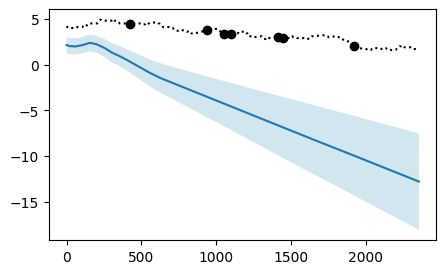

 81%|████████  | 81004/100001 [44:54<10:37, 29.80it/s]

iter 81001: Avg. Loss = 1.9247532082796097


 82%|████████▏ | 82004/100001 [45:28<10:39, 28.16it/s]

iter 82001: Avg. Loss = 1.9547644721269608


 83%|████████▎ | 83006/100001 [46:01<09:24, 30.11it/s]

iter 83001: Avg. Loss = 1.926888473510742


 84%|████████▍ | 84005/100001 [46:34<08:54, 29.93it/s]

iter 84001: Avg. Loss = 1.9017351158857345


 85%|████████▌ | 85005/100001 [47:08<08:21, 29.88it/s]

iter 85001: Avg. Loss = 1.9059141087532043


 86%|████████▌ | 86004/100001 [47:41<07:45, 30.09it/s]

iter 86001: Avg. Loss = 1.9257034811973572


 87%|████████▋ | 87006/100001 [48:15<07:19, 29.59it/s]

iter 87001: Avg. Loss = 1.910168628334999


 88%|████████▊ | 88006/100001 [48:48<06:48, 29.33it/s]

iter 88001: Avg. Loss = 1.9143948304653167


 89%|████████▉ | 89006/100001 [49:21<06:08, 29.87it/s]

iter 89001: Avg. Loss = 1.8849174441099168


 90%|█████████ | 90004/100001 [49:54<05:34, 29.89it/s]

iter 90001: Avg. Loss = 1.9350274233818054
iter 90001: Avg. Loss SLOW = 19.18426718604565


 91%|█████████ | 91006/100001 [50:27<05:01, 29.83it/s]

iter 91001: Avg. Loss = 1.8860006059408188


 92%|█████████▏| 92004/100001 [51:00<04:34, 29.18it/s]

iter 92001: Avg. Loss = 1.901904255270958


 93%|█████████▎| 93005/100001 [51:33<03:51, 30.18it/s]

iter 93001: Avg. Loss = 1.9214549828767777


 94%|█████████▍| 94004/100001 [52:06<03:20, 29.92it/s]

iter 94001: Avg. Loss = 1.9138055053949357


 95%|█████████▌| 95007/100001 [52:40<02:43, 30.61it/s]

iter 95001: Avg. Loss = 1.9114678596258163


 96%|█████████▌| 96006/100001 [53:13<02:12, 30.08it/s]

iter 96001: Avg. Loss = 1.8672225483655929


 97%|█████████▋| 97007/100001 [53:46<01:40, 29.85it/s]

iter 97001: Avg. Loss = 1.8783512105941773


 98%|█████████▊| 98006/100001 [54:19<01:06, 30.17it/s]

iter 98001: Avg. Loss = 1.9012629942893982


 99%|█████████▉| 99005/100001 [54:52<00:32, 30.56it/s]

iter 99001: Avg. Loss = 1.9049056693315507


100%|█████████▉| 99999/100001 [55:25<00:00, 29.84it/s]

iter 100001: Avg. Loss = 1.8842548823356629
iter 100001: Avg. Loss SLOW = 18.97063051402569


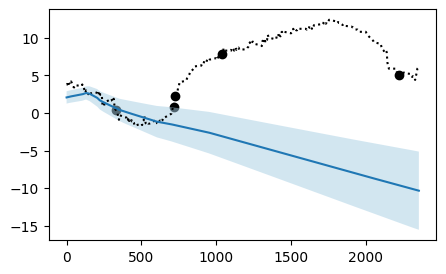

100%|██████████| 100001/100001 [55:25<00:00, 30.07it/s]


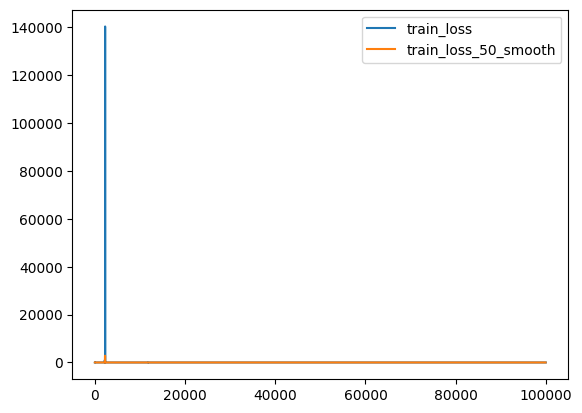

In [81]:
from src.plot import plot_predictive
from src.np import NeuralProcess

x_dim = 1
y_dim = 1
determ_dim = 128  # Dimension of representation of context points
latent_dim = 128  # Dimension of sampled latent variable
hidden_dim = 128  # Dimension of hidden layers in encoder and decoder

# np = NeuralProcess(x_dim=x_dim,
#                    y_dim=y_dim,
#                    hidden_dim=hidden_dim,
#                    latent_dim=latent_dim,
#                    determ_dim=determ_dim,
#                    knowledge_dim=768,
#                    n_h_layers_decoder=3,
#                    n_h_layers_phi_latent_encoder=2,
#                    n_h_layers_rho_latent_encoder=1,
#                    n_h_layers_phi_determ_encoder=6,
#                    n_h_layers_rho_determ_encoder=0,
#                    use_deterministic_path=False,
#                    )

np = NeuralProcess(x_dim=x_dim,
                   y_dim=y_dim,
                   hidden_dim=hidden_dim,
                   latent_dim=latent_dim,
                   determ_dim=determ_dim,
                   n_h_layers_decoder=4,
                   n_h_layers_phi_latent_encoder=2,
                   n_h_layers_rho_latent_encoder=1,
                   n_h_layers_phi_determ_encoder=5,
                   n_h_layers_rho_determ_encoder=0,
                   use_deterministic_path=True,
                   use_latent_self_attn=True,
                   use_determ_self_attn=False,
                   use_determ_cross_attn=True,
                   use_knowledge=True,
                   use_linear_knowledge_encoder=True,
                   knowledge_dim=768
                   )
print(np)
print(sum(p.numel() for p in np.parameters() if p.requires_grad))

#data = SineData(max_num_context=30, random_kernel_parameters=True)
optimiser = torch.optim.Adam(np.parameters(), lr=1e-3)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device {device}")
np.to(device)


data_path = '../data/data_with_desc.csv'
data = pd.read_csv(data_path, header=None)
data = TempData(data=data , max_num_context=10, device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu"))
train_loss = []
avg_loss_fast = 0
avg_loss_slow = 0
for iter in tqdm(range(100000+1)):
    np.training = True
    optimiser.zero_grad()

    batch, knowledge = data.generate_batch(batch_size=6, device=device, return_knowledge=True)
    # print(knowledge)
    tokens = tokenizer.batch_encode_plus(
            list(knowledge),
            add_special_tokens=True,
            max_length=100,
            padding='max_length',
            return_token_type_ids=True
        )
    input_ids = torch.tensor(tokens['input_ids']).to(device)
    attention_mask = torch.tensor(tokens['attention_mask']).to(device)
    token_type_ids = torch.tensor(tokens['token_type_ids']).to(device)
    lang_output = langmodel(input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids)
    knowledge = lang_output.pooler_output.unsqueeze(1)
    # print(knowledge.shape)

    p_y_pred, loss, log_lik = np(batch.x_context, batch.y_context, batch.x_target, knowledge, batch.y_target)

    loss.backward()
    optimiser.step()
    train_loss.append(loss.item())

    avg_loss_slow += loss.item()
    avg_loss_fast += loss.item()

    if iter % 1000 == 0 and iter > 0:
        print(f"iter {iter+1}: Avg. Loss = {avg_loss_fast/1000}")
        #print(f"iter. loss = {loss.item()}, iter. Loss2 (not being backpropped on) = {loss2.item()}")
        avg_loss_fast = 0
    if iter % 10000 == 0 and iter > 0:
        print(f"iter {iter+1}: Avg. Loss SLOW = {avg_loss_slow/1000}")
        avg_loss_slow = 0
    if iter % 20000 == 0:
        np.training = False
        batch = data.generate_batch(batch_size=1, device=np.device)
        plot_predictive(np, batch, knowledge=None, save=False, iter=None)
        np.training = True

plt.plot(train_loss, label='train_loss')
window = 50
plt.plot([sum(train_loss[i:i+window])/window for i in range(len(train_loss)-window)], label=f'train_loss_{window}_smooth')
plt.legend()
plt.show()
device = 'cuda' if torch.cuda.is_available() else 'cpu'
